In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('wordnet')

In [ ]:
import spacy

In [39]:
personas_data = pickle.load(open("Data/final.pickle", "rb")) # SHOULD BE IN FOLDER PICKLE SO TO MODIFY!

In [40]:
display(personas_data)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN,"[make, regarding, regarding]",[new],"[Mackenzie, husband, decision, make, niece]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN,NaN,NaN,NaN,NaN


In [41]:
# we drop the characters that have no words associated to them -  they do not appear in summaries
personas_noNA = personas_data.dropna(subset="Chunks")
display(personas_noNA)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336450,336451,NaN,NaN,NaN,jeffrey sieverding,NaN,tt9913288,Mail Man,M,NaN,Letters,2020.0,NaN,[stands],"[ordinary, normal]","[Charlie, Porter, leads, life, home, get, bill...","[[(Charlie, NNP)], [(Porter, NNP)], (ordinary,..."
336452,336453,NaN,NaN,NaN,tenley kellogg,NaN,tt9914522,Jade,F,NaN,The Holden Family Plan,2019.0,NaN,[make],[new],"[honeymoon, Mackenzie, Evan, decision, make, r...","[(honeymoon, NN), [(Mackenzie, NNP)], (new, JJ..."
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."


In [42]:
# Check the type of the first element in each column to make sure they were saved properly
first_verb = type(personas_noNA['Verbs'][0])
first_noun = type(personas_noNA['Nouns'][0])
first_adjective = type(personas_noNA['Adjectives'][0])

print(f'Type of the first element in Verbs column: {first_verb}')
print(f'Type of the first element in Nouns column: {first_noun}')
print(f'Type of the first element in Adjectives column: {first_adjective}')

Type of the first element in Verbs column: <class 'list'>
Type of the first element in Nouns column: <class 'list'>
Type of the first element in Adjectives column: <class 'list'>


In [43]:
# create a column "decade" to do the analysis on decades and not years
final_personas_df = personas_noNA.copy()
final_personas_df['decade'] = final_personas_df['release_date'] // 10 * 10
display(final_personas_df)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent...",2000.0
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,...",2000.0
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),...",2000.0
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans...",2000.0
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ...",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336450,336451,NaN,NaN,NaN,jeffrey sieverding,NaN,tt9913288,Mail Man,M,NaN,Letters,2020.0,NaN,[stands],"[ordinary, normal]","[Charlie, Porter, leads, life, home, get, bill...","[[(Charlie, NNP)], [(Porter, NNP)], (ordinary,...",2020.0
336452,336453,NaN,NaN,NaN,tenley kellogg,NaN,tt9914522,Jade,F,NaN,The Holden Family Plan,2019.0,NaN,[make],[new],"[honeymoon, Mackenzie, Evan, decision, make, r...","[(honeymoon, NN), [(Mackenzie, NNP)], (new, JJ...",2010.0
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),...",2010.0
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),...",2010.0


In [44]:
final_personas_df_perso = final_personas_df.dropna(subset="personnas")
display(final_personas_df_perso)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
396,397,196176.0,/m/01bwgr,/m/041rx,dustin hoffman,tranquil_fury,tt0067800,David Sumner,M,11148828.0,Straw Dogs,1971.0,34.0,"[differing, regarding, come, wants, earning, w...","[timid, timid, American, young, tension, immer...","[Sumner, American, David, mathematician, wife,...","[[(Sumner, NNP)], (timid, JJ), [(American, NNP...",1970.0
1521,1522,1157158.0,/m/04c13q,NaN,edward norton,granola_person,tt0266452,Sheldon Mopes,M,8382938.0,Death to Smoochy,2002.0,33.0,"[replaced, providing, seen, hatches, bring, ho...","[squeaky, clean, squeaky, clean, sincere, inte...","[Mopes, character, Smoochy, Sheldon, character...","[(replaced, VBN), (squeaky, JJ), (clean, JJ), ...",2000.0
1890,1891,504242.0,/m/02j9_2,/m/041rx,david krumholtz,playful_hacker,tt0379786,Mr. Universe,M,NaN,Serenity,2005.0,27.0,"[named, promising, tasked, neutralizing, visit...","[young, high, animalistic, animalistic, eat, n...","[girl, Tam, number, Operative, Alliance, Seren...","[(young, JJ), (girl, NN), (named, VBN), (Tam, ...",2000.0
2231,2232,6917005.0,/m/0gwypk,/m/041rx,matthew broderick,charmer,tt0293437,Professor Harold Hill,M,NaN,The Music Man,2003.0,41.0,"[con, makes, sitting, named, realizes, named, ...","[latest, anvil, fresh, fresh, anywhere, hotel,...","[Harold, Hill, con, Professor, Hill, artist, P...","[[(Harold, NNP)], [(Hill, NNP)], (con, NN), (P...",2000.0
2810,2811,445066.0,/m/0299hs,NaN,ronny cox,corrupt_corporate_executive,tt0093870,Dick Jones,M,53424681.0,RoboCop,1987.0,49.0,"[run, headed, kills, kills, transferred, aband...","[future, robotic, senior, senior, junior, prec...","[Detroit, Michigan, Omni, Consumer, Products, ...","[(future, JJ), [(Detroit, NNP), (Michigan, NNP...",1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223869,223870,2688769.0,/m/07y2zw,NaN,laura san giacomo,ophelia,tt0102744,Crazy Cora,F,21413105.0,Quigley Down Under,1990.0,29.0,"[prevent, forcing, forcing, seeing, calls, bea...","[unconsciousness, fourth, tragic, nearby, infa...","[tries, Cora, wagon, prevent, Crazy, wagon, be...","[(tries, NNS), (prevent, VBP), (forcing, VBG),...",1990.0
224649,224650,101954.0,/m/0pv3x,/m/0d7wh,colin firth,crazy_jealous_guy,tt0116209,Geoffrey Clifton,M,NaN,The English Patient,1996.0,36.0,"[brought, reveals, reveals, bolstered, joins, ...","[married, present, interrogated, German, patie...","[woman, Katharine, army, torture, addition, co...","[(married, JJ), (woman, NN), [(Katharine, NNP)...",1990.0
224836,224837,9513043.0,/m/02ph9tm,/m/041rx,adam sandler,warrior_poet,tt0960144,Zohan,M,201802891.0,You Don't Mess with the Zohan,2008.0,42.0,"[respected, disenchanted, become, fighting, in...","[finest, disgusted, disgusted, constant, sever...","[Dvir, superhuman, Israeli, Zohan, Dvir, Israe...","[[(Dvir, NNP)], (superhuman, NN), [(Israeli, N...",2000.0
226978,226979,52549.0,/m/0dtfn,/m/01qhm_,harrison ford,charmer,tt0076759,Han Solo,M,775398007.0,Star Wars Episode IV: A New Hope,1977.0,35.0,"[stolen, captured, captured, knows, named, tak...","[Rebel, first, analyze, vulnerable, assault, r...","[Alliance, Galactic, Empire, Death, Princess, ...","[[(Rebel, JJ)], [(Alliance, NNP)], (stolen, VB...",1970.0


In [45]:
# sort the rows to have decades in ascending orders
final_personas_df = final_personas_df.sort_values(by='decade')

In [28]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the 'Verbs' column
final_personas_df['Verbs'] = final_personas_df['Verbs'].apply(lambda x: [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]) for sentence in x])

# Lemmatize the 'Adjectives' column
final_personas_df['Adjectives'] = final_personas_df['Adjectives'].apply(lambda x: [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]) for sentence in x])

# Lemmatize the 'Nouns' column
final_personas_df['Nouns'] = final_personas_df['Nouns'].apply(lambda x: [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]) for sentence in x])


In [29]:
display(test_df)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
153634,153635,2543813.0,/m/07m2js,NaN,wesley ruggles,NaN,tt0007162,Client with Ring,M,NaN,The Pawnshop,1916.0,NaN,"[fellow, examining, examining, pawnshop, dusti...","[burglar, dependable, assistant, pawnshop, fab...","[competes, shop, capture, destroys, clock, det...","[(competes, NNS), (fellow, VBP), (shop, NN), (...",1910.0
195621,195622,19200494.0,/m/04ljx3z,NaN,mary miles minter,NaN,tt0125067,Millicent Hawthorne,F,NaN,A Dream or Two Ago,1916.0,14.0,"[wealthy, kidnaps, raise, try, supporting, hel...","[Hawthorne, wealthy, help, amnesia]","[daughter, Millicent, daughter, family, family...","[[(Hawthorne, JJ)], (daughter, NN), (wealthy, ...",1910.0
232257,232258,NaN,NaN,NaN,roscoe 'fatty' arbuckle,NaN,tt0008500,The Husband,M,NaN,A Reckless Romeo,1917.0,30.0,"[philandering, captured, take, footage, shown,...","[public, newsreel]","[flirtation, beautiful, cameraman, wife, mothe...","[(philandering, VBG), (public, JJ), (flirtatio...",1910.0
232234,232235,NaN,NaN,NaN,harvey clark,NaN,tt0008423,Captain Sears,M,NaN,Periwinkle,1917.0,32.0,"[drowns, rescued]","[waif, wealthy]",[day],"[(waif, JJ), (One, CD), (day, NN), (drowns, VB...",1910.0
232230,232231,NaN,NaN,NaN,george fisher,NaN,tt0008423,Richard Langdon Evans,M,NaN,Periwinkle,1917.0,26.0,"[waif, rescued]","[drowns, wealthy]","[Periwinkle, teenage, day, fall, love, marry]","[[(Periwinkle, NNP)], (teenage, NN), (waif, VB...",1910.0
232222,232223,NaN,NaN,NaN,emma kluge,NaN,tt0008419,Mrs. Greenwood,F,NaN,Peggy Leads the Way,1917.0,45.0,[thought],"[wealthy, wealthy, summary]","[store, owner, son, Roland, York, Times, Revie...","[(always, RB), (thought, VBN), (father, RB), (...",1910.0
232220,232221,NaN,NaN,NaN,carl stockdale,NaN,tt0008419,Roland Gardiner,M,NaN,Peggy Leads the Way,1917.0,43.0,"[finished, finishing, make, love]","[great, wealthy, grocery, grocery, wealthy, we...","[Peggy, school, store, find, store, find, stor...","[[(Peggy, NNP)], (finished, VBD), (finishing, ...",1910.0
232219,232220,NaN,NaN,NaN,andrew arbuckle,NaN,tt0008419,H.E. Manners,M,NaN,Peggy Leads the Way,1917.0,30.0,"[finished, finishing, son]","[great, wealthy, grocery, grocery, wealthy]","[Peggy, school, store, find, store, find, stor...","[[(Peggy, NNP)], (finished, VBD), (finishing, ...",1910.0
232218,232219,NaN,NaN,NaN,george ahearn,NaN,tt0008419,Tim Martin,M,NaN,Peggy Leads the Way,1917.0,31.0,[make],[summary],"[grocery, store, owner, profit, try, Roland, N...","[(grocery, NN), (store, NN), (owner, NN), (pro...",1910.0
90413,90414,18161370.0,/m/04csx59,NaN,henry b. walthall,NaN,tt0010112,Michael Lanyard,M,NaN,The False Faces,1919.0,41.0,"[known, headed]","[professional, professional, responsible]","[World, thief, World, War, thief, stop, death,...","[(World, NNP), (professional, JJ), (thief, NN)...",1910.0


In [46]:
unique_decades = final_personas_df['decade'].unique() # control the order of the decades
print(unique_decades)

[1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020.]


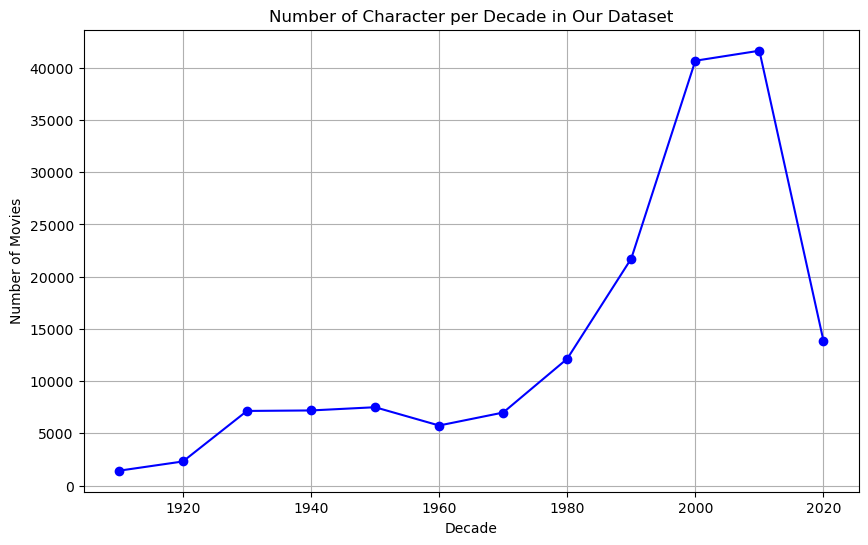

In [47]:
# group the movies by year
#characters_data['release_date'] = pd.to_datetime(characters_data['release_date'])
personas_by_decade = final_personas_df.groupby(final_personas_df['decade'])
count_per_decade = personas_by_decade.size()

# Calculate the proportion of men and women per year
#proportion_female = personas_by_decade['actor_gender'].apply(lambda x: (x == 'F').sum() / len(x))
#proportion_male = 1 - proportion_female

plt.figure(figsize=(10, 6))
count_per_decade.plot(kind='line', color='blue', marker='o')
plt.title('Number of Character per Decade in Our Dataset')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [48]:
def create_gender_dictionaries(df):
    # Initialize dictionaries for male and female characters
    male_dict = {}
    female_dict = {}

    # Iterate through the dataframe and populate dictionaries
    for index, row in df.iterrows():
        gender = row['actor_gender']
        decade = row['decade'] # we want the create a ductionnary per decade to later analyze

        # Check if the gender is male and handle empty lists (characters don't necessarily have words of the 3 cat. associated to them
        if gender == 'M':
            if decade not in male_dict:
                male_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []} # create a dict per decade

            male_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            male_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            male_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

        # Check if the gender is female and handle empty lists
        elif gender == 'F':
            if decade not in female_dict:
                female_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []}

            female_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            female_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            female_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

    return male_dict, female_dict


In [49]:
male_dict, female_dict = create_gender_dictionaries(final_personas_df)

In [50]:
#test function to check the dictionnaries per decade
def print_gender_dictionaries(male_dict, female_dict):
    # Print the first few elements of each decade in the male dictionary
    print("Male Dictionary:")
    for decade, values in male_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

    # Print the first few elements of each decade in the female dictionary
    print("Female Dictionary:")
    for decade, values in female_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

# Assuming df is your DataFrame
print_gender_dictionaries(male_dict, female_dict)

Male Dictionary:
Decade: 1910.0
Verbs: ['fellow', 'examining', 'examining', 'pawnshop', 'dusting']
Adjectives: ['burglar', 'dependable', 'assistant', 'pawnshop', 'fabulous']
Nouns: ['competes', 'shop', 'capture', 'destroys', 'clock']

Decade: 1920.0
Verbs: ['gets', 'outbreak', 'escaping', 'rescued', 'end']
Adjectives: ['rumble', 'several', 'Tong', 'timely', 'arrival']
Nouns: ['ride', 'home', 'Buster', 'seat', 'Buster']

Decade: 1930.0
Verbs: ['tell', 'tell', 'love', 'wants', 'wants']
Adjectives: ['bedtime', 'visual', 'shtick', 'next', 'whole']
Nouns: ['Healy', 'proceeds', 'Ride', 'daughter', 'Pauline']

Decade: 1940.0
Verbs: ['meets', 'getting', 'pressed', 'dying', 'signing']
Adjectives: ['seaman', 'vital', 'Soviet', 'port', 'second']
Nouns: ['spends', 'time', 'wife', 'Joe', 'marries']

Decade: 1950.0
Verbs: ['tells', 'agrees', 'worked', 'hired', 'murdered']
Adjectives: ['Egyptian', 'general', 'general', 'mutual', 'general']
Nouns: ['Julius', 'Caesar', 'Queen', 'Cleopatra', 'Queen']

D

In [51]:
def calculate_word_frequencies(dictionary):
    # Initialize a dictionary for each category (Verbs, Adjectives, Nouns)
    frequencies = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

    # Iterate through the dictionary and calculate word frequencies
    for category, words in dictionary.items():
        total_words = len(words)
        word_counter = Counter(words)
        frequencies[category] = {word: count / total_words for word, count in word_counter.items()}

    return frequencies

In [52]:
male_frequencies_per_decade  = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in male_dict.items()}
female_frequencies_per_decade = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in female_dict.items()}
#display(male_frequencies_per_decade)

In [53]:
def subtract_frequencies(frequencies_1, frequencies_2):
    subtracted_frequencies = {}

    # Iterate through decades
    for decade in frequencies_1.keys():
        # Initialize dictionary for the current decade
        subtracted_frequencies[decade] = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

        # Iterate through categories (Verbs, Adjectives, Nouns)
        for category in frequencies_1[decade].keys():
            # Get the set of words in both dictionaries for the current category
            common_words = set(frequencies_1[decade][category].keys()) | set(frequencies_2[decade][category].keys())

            # Calculate the subtracted frequencies for the current category
            for word in common_words:
                freq_1 = frequencies_1[decade][category].get(word, 0)
                freq_2 = frequencies_2[decade][category].get(word, 0)
                subtracted_frequencies[decade][category][word] = freq_1 - freq_2

            # Add the remaining words (present in one dictionary but not the other) with a frequency of 0
            remaining_words_1 = set(frequencies_1[decade][category].keys()) - common_words
            remaining_words_2 = set(frequencies_2[decade][category].keys()) - common_words

            for word in remaining_words_1:
                subtracted_frequencies[decade][category][word] = frequencies_1[decade][category][word]

            for word in remaining_words_2:
                subtracted_frequencies[decade][category][word] = 0  # Frequency is 0 for words only in the second dictionary

    return subtracted_frequencies

In [54]:
relative_frequencies = subtract_frequencies(male_frequencies_per_decade, female_frequencies_per_decade)

In [69]:
def plot_top_words_per_decade(male_frequencies_per_decade, female_frequencies_per_decade, categories, top_n=10):
    # Create subplots for each category
    decades = male_frequencies_per_decade.keys()
    num_categories = len(categories)

    fig, axs = plt.subplots(len(decades), num_categories * 2, figsize=(5 * num_categories, 3 * len(decades)))

    # Iterate through each decade
    for i, decade in enumerate(decades):
        for j, category in enumerate(categories):
            male_frequencies = male_frequencies_per_decade[decade][category]
            female_frequencies = female_frequencies_per_decade[decade][category]

            # Get the top N words and their frequencies for both genders
            top_male_words = [word for _, word in sorted(zip(male_frequencies.values(), male_frequencies.keys()), reverse=True)[:top_n]]
            top_male_frequencies = [male_frequencies[word] for word in top_male_words]

            top_female_words = [word for _, word in sorted(zip(female_frequencies.values(), female_frequencies.keys()), reverse=True)[:top_n]]
            top_female_frequencies = [female_frequencies[word] for word in top_female_words]

            # Plot the bar chart for male characters
            bars_male = axs[i, j * 2].bar(top_male_words, top_male_frequencies, color='blue')
            axs[i, j * 2].set_title(f'Male - {category} {decade}')
            #axs[i, j * 2].set_xlabel('Words')
            axs[i, j * 2].set_ylabel('Frequency')

            # Plot the bar chart for female characters
            bars_female = axs[i, j * 2 + 1].bar(top_female_words, top_female_frequencies, color='pink')
            axs[i, j * 2 + 1].set_title(f'Female - {category} {decade}')
            #axs[i, j * 2 + 1].set_xlabel('Words')
            axs[i, j * 2 + 1].set_ylabel('Frequency')

            # Rotate x-axis tick labels
            axs[i, j * 2].set_xticklabels(top_male_words, rotation=45, ha='right')
            axs[i, j * 2 + 1].set_xticklabels(top_female_words, rotation=45, ha='right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_25253/2326629281.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j * 2].set_xticklabels(top_male_words, rotation=45, ha='right')
/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_25253/2326629281.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j * 2 + 1].set_xticklabels(top_female_words, rotation=45, ha='right')


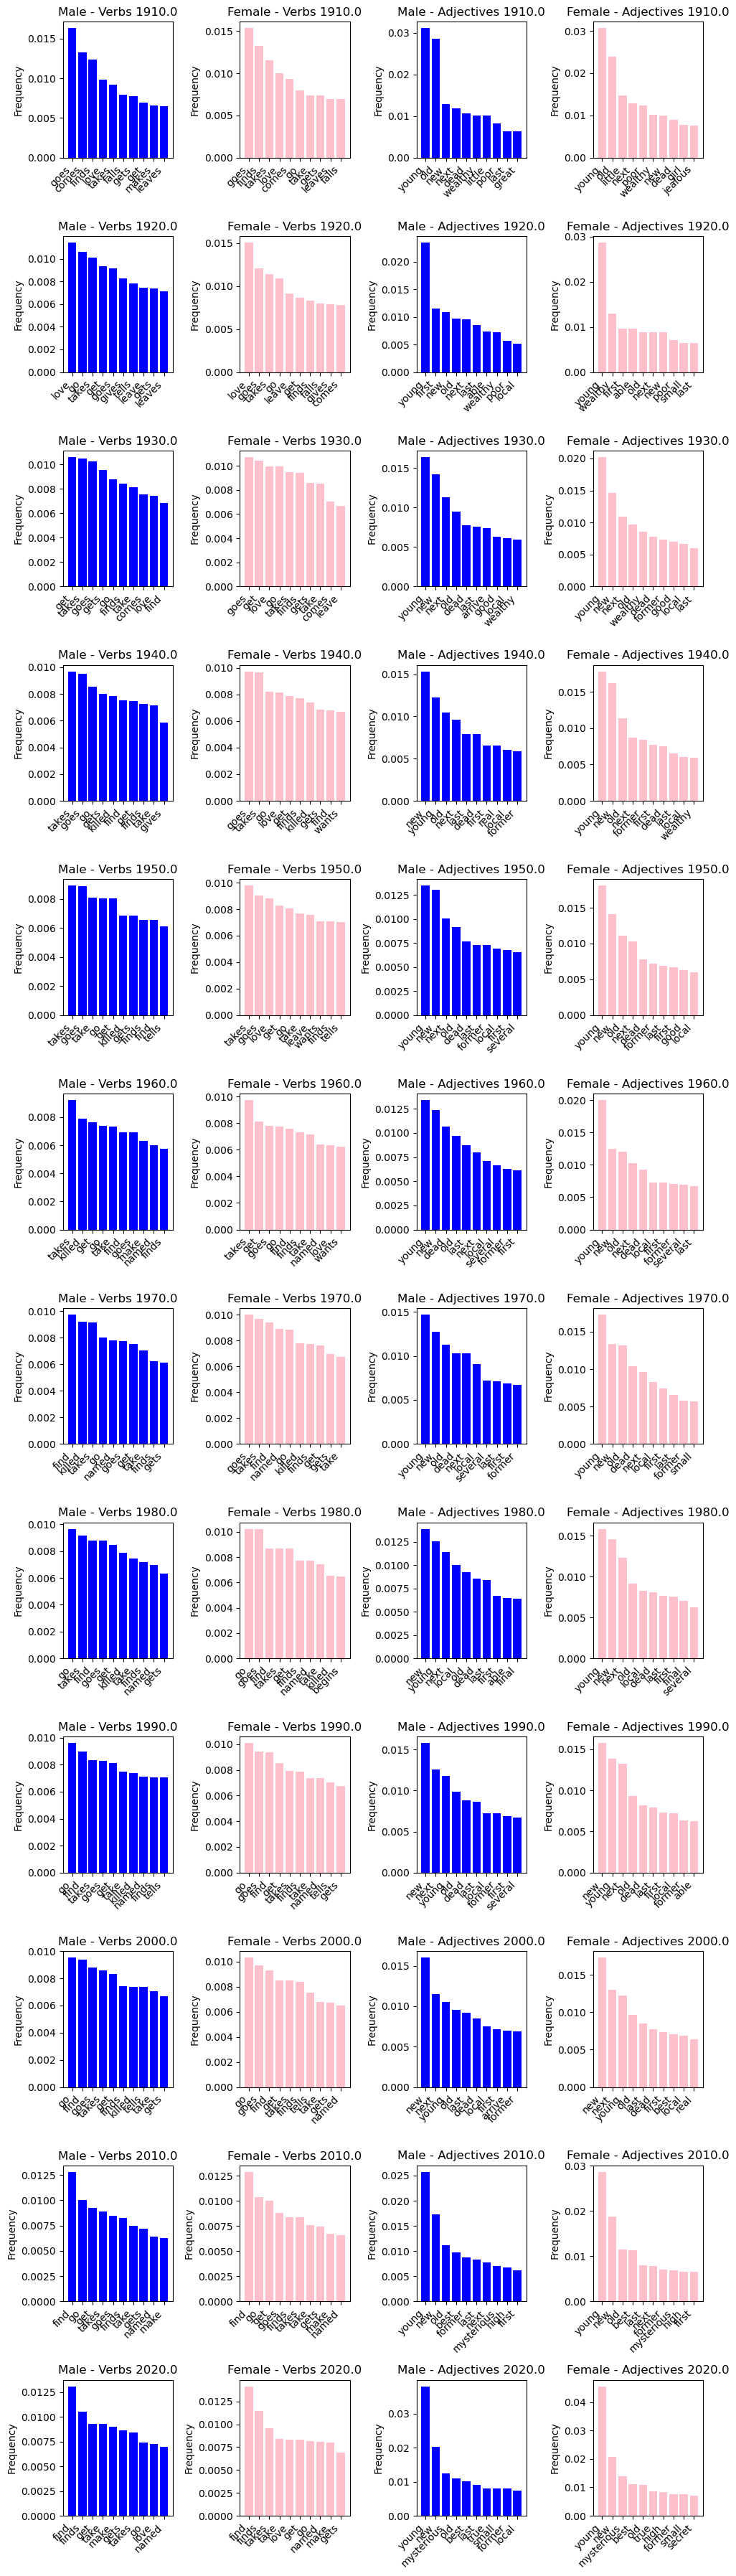

In [70]:
plot_top_words_per_decade(male_frequencies_per_decade, female_frequencies_per_decade, ['Verbs', 'Adjectives'])

do relative freq : male - female
prendre en valeur abs les top 10 et les plot (-1,1)
si le mot existe pas dans l'autre dict, then freq = 0 
prendre top 10 femmes et top 10 hommes 
voir pour décider un threshold if needed (si freq diff vraiment vraiment minime)

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_43865/3769153112.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')


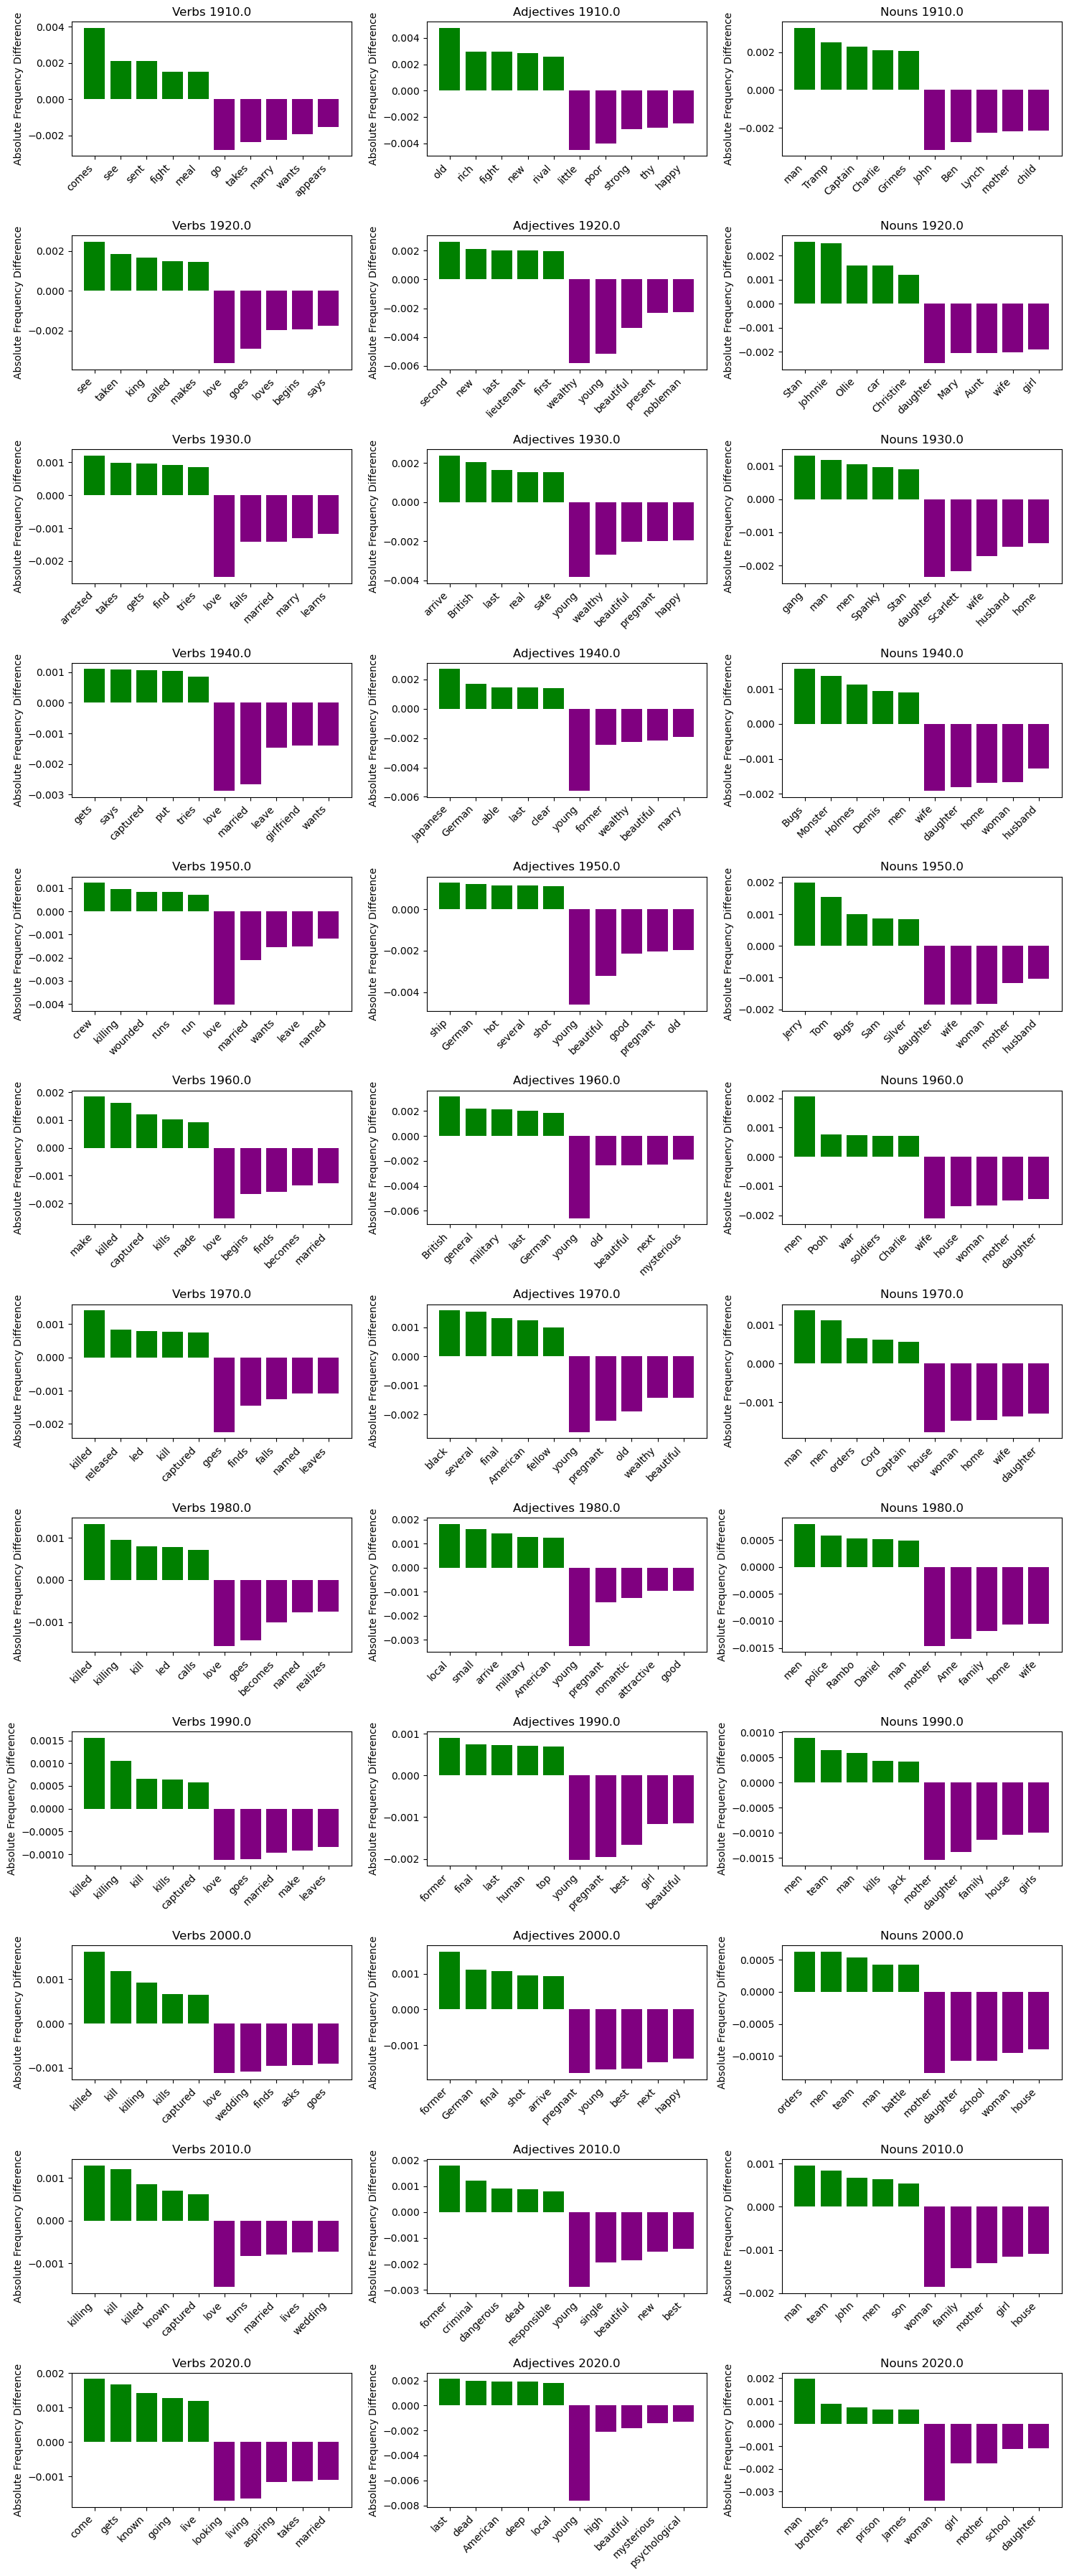

In [55]:
import matplotlib.pyplot as plt

def plot_top_words_per_decade(relative_frequencies, categories):
    # Create subplots for each category
    decades = relative_frequencies.keys()
    num_categories = len(categories)

    fig, axs = plt.subplots(len(decades), num_categories, figsize=(5 * num_categories, 3 * len(decades)))

    # Iterate through each decade
    for i, decade in enumerate(decades):
        for j, category in enumerate(categories):
            # Get the top words and their frequencies
            top_words_positive = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0],
                reverse=True
            )[:5]]

            top_words_negative = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0]
            )[:5]]

            top_words = top_words_positive + top_words_negative
            top_frequencies = [relative_frequencies[decade][category][word] for word in top_words]

            # Plot the bar chart for each category
            bars = axs[i, j].bar(top_words, top_frequencies, color=['green' if freq >= 0 else 'purple' for freq in top_frequencies])
            axs[i, j].set_title(f'{category} {decade}')
            axs[i, j].set_ylabel('Absolute Frequency Difference')

            # Rotate x-axis tick labels
            axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Example usage
categories_to_plot = ['Verbs', 'Adjectives', 'Nouns']
plot_top_words_per_decade(relative_frequencies, categories_to_plot)
